In [1]:
!pip install flask

In [2]:
import os
from pathlib import Path
import yaml
from ultralytics import YOLO
import shutil
from IPython.display import display, Image
import matplotlib.pyplot as plt
import torch



In [10]:
class_names = ["muzzles"]  # Replace with your class names
dataset_path = "/Users/saidheeraj/Desktop/Yolo_cutom/Cattle muzzle dataset.v1i.yolov11"  # Replace with your dataset path

# Create base configuration
config = {
    'dataset_path': dataset_path,
    'epochs': 35,
    'batch_size':32,
    'img_size': 553,
    'model_type': 'yolov8n.pt'  # Options: yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt
}


In [12]:
def setup_training_config(data_yaml_path, config):
    """Setup YOLO training configuration"""
    train_config = {
        'data': data_yaml_path,
        'epochs': config['epochs'],
        'batch': config['batch_size'],
        'imgsz': config['img_size'],
        'device': 'cpu',  # Use GPU if available, will default to CPU if no GPU
        'workers': 8,
        'optimizer': 'Adam',
        'patience': 50,
        'save': True,
        'project': 'yolo_training',
        'name': 'custom_model',
    }
    return train_config


In [13]:
def train_yolo(config, class_names):
    """Train YOLO model"""
    # Verify dataset structure
    data_yaml_path = os.path.join(config['dataset_path'], 'data.yaml')

    # Setup training configuration
    train_config = setup_training_config(data_yaml_path, config)
    
    # Initialize model
    model = YOLO(config['model_type'])
    
    # Train model
    try:
        results = model.train(**train_config)
        print("Training completed successfully!")
        return results, model
    except Exception as e:
        print(f"Error during training: {str(e)}")
        raise



In [14]:
results, model = train_yolo(config, class_names)


New https://pypi.org/project/ultralytics/8.3.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.73 🚀 Python-3.10.9 torch-2.6.0 CPU (Apple M2)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/saidheeraj/Desktop/Yolo_cutom/Cattle muzzle dataset.v1i.yolov11/data.yaml, epochs=35, time=None, patience=50, batch=64, imgsz=553, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=yolo_training, name=custom_model5, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

train: Scanning /Users/saidheeraj/Desktop/Yolo_cutom/Cattle muzzle dataset.v1i.yolov11/train/labels.cache... 1146 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1146/1146 [00:00<?, ?it/s]
val: Scanning /Users/saidheeraj/Desktop/Yolo_cutom/Cattle muzzle dataset.v1i.yolov11/valid/labels.cache... 164 images, 1 backgrounds, 0 corrupt: 100%|██████████| 164/164 [00:00<?, ?it/s]

Plotting labels to yolo_training/custom_model5/labels.jpg... 


optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 576 train, 576 val
Using 0 dataloader workers
Logging results to yolo_training/custom_model5
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35         0G      1.376      1.893      1.363        113        576: 100%|██████████| 18/18 [10:29<00:00, 34.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.79s/it]

                   all        164        182     0.0827     0.0549     0.0351     0.0184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35         0G      1.355      1.058      1.367        106        576: 100%|██████████| 18/18 [09:50<00:00, 32.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.28s/it]

                   all        164        182      0.002      0.286    0.00155   0.000428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35         0G      1.346       1.01      1.371        103        576: 100%|██████████| 18/18 [09:35<00:00, 31.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.31s/it]

                   all        164        182    0.00409      0.335    0.00291   0.000762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35         0G      1.359      1.007      1.365        114        576: 100%|██████████| 18/18 [09:53<00:00, 32.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.83s/it]

                   all        164        182    0.00224      0.148    0.00132    0.00046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35         0G      1.374     0.9741      1.397        100        576: 100%|██████████| 18/18 [09:43<00:00, 32.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.34s/it]

                   all        164        182       0.19      0.264      0.085     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35         0G      1.373     0.9704      1.392        114        576: 100%|██████████| 18/18 [09:41<00:00, 32.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.02s/it]

                   all        164        182   0.000419     0.0934   0.000208   6.25e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35         0G      1.321     0.9028      1.368        106        576: 100%|██████████| 18/18 [09:40<00:00, 32.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.76s/it]

                   all        164        182     0.0892      0.132     0.0413     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35         0G      1.321     0.8559      1.365         94        576: 100%|██████████| 18/18 [09:29<00:00, 31.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.18s/it]

                   all        164        182     0.0269      0.423     0.0206    0.00784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35         0G      1.254     0.8231       1.33        106        576: 100%|██████████| 18/18 [09:37<00:00, 32.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.27s/it]

                   all        164        182      0.545      0.582      0.487      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35         0G      1.254     0.7941      1.337         97        576: 100%|██████████| 18/18 [09:14<00:00, 30.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.20s/it]

                   all        164        182      0.491      0.544      0.445      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35         0G      1.232     0.7514      1.312        113        576: 100%|██████████| 18/18 [09:12<00:00, 30.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.50s/it]

                   all        164        182      0.752      0.582      0.633      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35         0G      1.237     0.7466      1.328         95        576: 100%|██████████| 18/18 [09:39<00:00, 32.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.19s/it]

                   all        164        182      0.854      0.703       0.78      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35         0G      1.199      0.727      1.295        116        576: 100%|██████████| 18/18 [09:14<00:00, 30.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.20s/it]

                   all        164        182      0.833      0.681       0.75      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35         0G      1.221     0.7263      1.307        116        576: 100%|██████████| 18/18 [09:19<00:00, 31.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.99s/it]

                   all        164        182     0.0113     0.0495    0.00624    0.00213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35         0G       1.19     0.7105       1.28        114        576: 100%|██████████| 18/18 [09:07<00:00, 30.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.86s/it]

                   all        164        182      0.776      0.577      0.653      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35         0G      1.154     0.6674      1.266         88        576: 100%|██████████| 18/18 [09:01<00:00, 30.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.25s/it]

                   all        164        182      0.773      0.659      0.714      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35         0G      1.144       0.66      1.253         94        576: 100%|██████████| 18/18 [09:09<00:00, 30.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.03s/it]

                   all        164        182      0.937      0.786      0.835      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35         0G       1.17     0.6721      1.275        110        576: 100%|██████████| 18/18 [09:28<00:00, 31.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.06s/it]

                   all        164        182      0.886      0.709      0.767      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35         0G       1.14     0.6457      1.264         89        576: 100%|██████████| 18/18 [09:26<00:00, 31.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.92s/it]

                   all        164        182      0.924      0.807      0.846      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35         0G      1.112      0.626      1.238        107        576: 100%|██████████| 18/18 [09:07<00:00, 30.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.91s/it]

                   all        164        182      0.972      0.791      0.867      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35         0G      1.096     0.6161      1.218        115        576: 100%|██████████| 18/18 [09:11<00:00, 30.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.08s/it]

                   all        164        182      0.935      0.808      0.879      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35         0G      1.074     0.5919      1.211         99        576: 100%|██████████| 18/18 [09:00<00:00, 30.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.23s/it]

                   all        164        182      0.948      0.794      0.866      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35         0G      1.093     0.6121      1.232        114        576: 100%|██████████| 18/18 [09:18<00:00, 31.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.98s/it]

                   all        164        182      0.962      0.802      0.888      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35         0G      1.064     0.5796      1.212        101        576: 100%|██████████| 18/18 [09:18<00:00, 31.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.03s/it]

                   all        164        182      0.966      0.781      0.855      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35         0G      1.068     0.5663      1.219        103        576: 100%|██████████| 18/18 [10:27<00:00, 34.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.38s/it]

                   all        164        182      0.949      0.791      0.841      0.535


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35         0G      1.011     0.5324      1.237         61        576: 100%|██████████| 18/18 [13:12<00:00, 44.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.78s/it]

                   all        164        182       0.98      0.789      0.871      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35         0G     0.9784      0.491      1.243         62        576: 100%|██████████| 18/18 [11:46<00:00, 39.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.03s/it]

                   all        164        182      0.954      0.797      0.892      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35         0G      0.965     0.4754      1.226         58        576: 100%|██████████| 18/18 [11:44<00:00, 39.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.99s/it]

                   all        164        182      0.955       0.78      0.872      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35         0G     0.9475     0.4493      1.218         58        576: 100%|██████████| 18/18 [09:38<00:00, 32.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.04s/it]

                   all        164        182      0.979      0.813       0.91      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35         0G     0.9627     0.4492      1.218         59        576: 100%|██████████| 18/18 [08:42<00:00, 29.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.14s/it]

                   all        164        182       0.92      0.863      0.919      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35         0G     0.9147     0.4352      1.192         57        576: 100%|██████████| 18/18 [08:32<00:00, 28.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.91s/it]

                   all        164        182       0.95      0.802      0.893      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35         0G     0.9119     0.4275      1.185         59        576: 100%|██████████| 18/18 [08:51<00:00, 29.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.37s/it]

                   all        164        182      0.945       0.83       0.93      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35         0G     0.9022     0.4123       1.18         60        576: 100%|██████████| 18/18 [09:13<00:00, 30.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.28s/it]

                   all        164        182      0.969      0.857      0.927      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35         0G     0.8778     0.3984      1.158         60        576: 100%|██████████| 18/18 [08:43<00:00, 29.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.08s/it]

                   all        164        182      0.973      0.852      0.933      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35         0G     0.8595     0.3947      1.143         59        576: 100%|██████████| 18/18 [08:33<00:00, 28.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.25s/it]

                   all        164        182      0.963      0.851      0.936      0.592



35 epochs completed in 5.800 hours.
Optimizer stripped from yolo_training/custom_model5/weights/last.pt, 6.2MB
Optimizer stripped from yolo_training/custom_model5/weights/best.pt, 6.2MB

Validating yolo_training/custom_model5/weights/best.pt...
Ultralytics 8.3.73 🚀 Python-3.10.9 torch-2.6.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.30s/it]


                   all        164        182      0.945       0.83       0.93      0.598
Speed: 0.5ms preprocess, 96.7ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to yolo_training/custom_model5
Training completed successfully!


In [2]:
import cv2

def test_muzzle_detection(image_path, model):
    # Make prediction
    results = model.predict(image_path)[0]
    return results

test_image = "/Users/saidheeraj/Downloads/cattle muzzle detection/test/images/IMG20230807185258_JPG.rf.3c7c3fb8ab2099f9d9c77f2d43792138.jpg"
result = test_muzzle_detection(test_image, model)
print(result)



NameError: name 'model' is not defined

In [28]:
# Plot using matplotlib
plt.figure(figsize=(10, 10))
img = cv2.imread(test_image)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
for box in result.boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    conf = box.conf[0]
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red', linewidth=2))
    plt.text(x1, y1-10, f'Muzzle {conf:.2f}', color='red', fontsize=12)

plt.axis('off')
plt.savefig('test.png')  



In [1]:
# Save the model
model.save('muzzle_detector_v3.pt')

# Export model to ONNX format (optional, for deployment)
model.export(format='onnx')



NameError: name 'model' is not defined

In [6]:
# To load the model later:
from ultralytics import YOLO
loaded_model = YOLO('muzzle_detector_v3.pt')


image 1/1 /Users/saidheeraj/Desktop/Bot/filtered_cattle_dataset/cattle_21/IMG_20241108_103926.jpg: 576x288 1 muzzles, 56.9ms
Speed: 3.7ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 288)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'muzzles'}
obb: None
orig_img: array([[[202, 168, 108],
        [202, 168, 108],
        [202, 168, 108],
        ...,
        [209, 187, 151],
        [209, 187, 151],
        [208, 186, 150]],

       [[202, 168, 108],
        [202, 168, 108],
        [202, 168, 108],
        ...,
        [211, 189, 153],
        [211, 189, 153],
        [210, 188, 152]],

       [[202, 168, 109],
        [202, 168, 109],
        [202, 168, 109],
        ...,
        [211, 189, 153],
        [211, 189, 153],
        [210, 188, 152]],

       ...,

       [[ 46,  66,  84],
        [ 45,  65,  83],
        [ 46,  66,  84],
        ...,
    

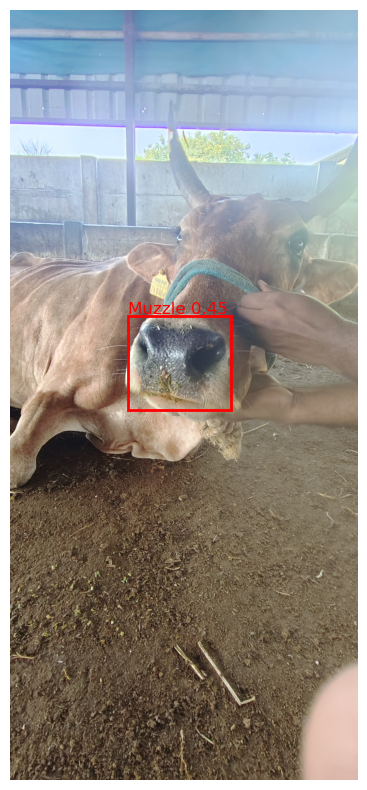

In [8]:
import cv2
import matplotlib.pyplot as plt

def test_muzzle_detection(image_path, model):
    # Make prediction
    results = model.predict(image_path)[0]
    return results

test_image = "/Users/saidheeraj/Desktop/Bot/filtered_cattle_dataset/cattle_21/IMG_20241108_103926.jpg"
result = test_muzzle_detection(test_image, loaded_model)
print(result)
plt.figure(figsize=(10, 10))
img = cv2.imread(test_image)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
for box in result.boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    conf = box.conf[0]
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red', linewidth=2))
    plt.text(x1, y1-10, f'Muzzle {conf:.2f}', color='red', fontsize=12)

plt.axis('off')
plt.savefig('test.png')



In [1]:
!pip install ultralytics tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 MB 3.1 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 7.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 8.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 11.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 5.3 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.0/398.0 kB 7.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from ultralytics import YOLO

In [2]:
model = YOLO('muzzle_detector_v3.pt')




In [3]:
# Export to TensorFlow Lite format
model.export(format='tflite')

Ultralytics 8.3.89 🚀 Python-3.12.7 torch-2.6.0 CPU (Apple M2)

PyTorch: starting from 'muzzle_detector_v3.pt' with input shape (1, 3, 576, 576) BCHW and output shape(s) (1, 5, 6804) (5.9 MB)
requirements: Ultralytics requirements ['onnx2tf>1.17.5,<=1.26.3', 'tflite_support', 'protobuf>=5'] not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)

TensorFlow SavedModel: starting export with tensorflow 2.19.0...

ONNX: starting export with onnx 1.18.0 opset 19...
ONNX: slimming with onnxslim 0.1.53...
ONNX: export success ✅ 0.8s, saved as 'muzzle_detector_v3.onnx' (11.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.9...
ERROR: The trace log is below.
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/onnx2tf/utils/common_functions.py", line 314, in print_wrapper_func
    result = func(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/onnx2tf/utils/common

SystemExit: 1